# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib  inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel.csv', sep=';')

<AxesSubplot:>

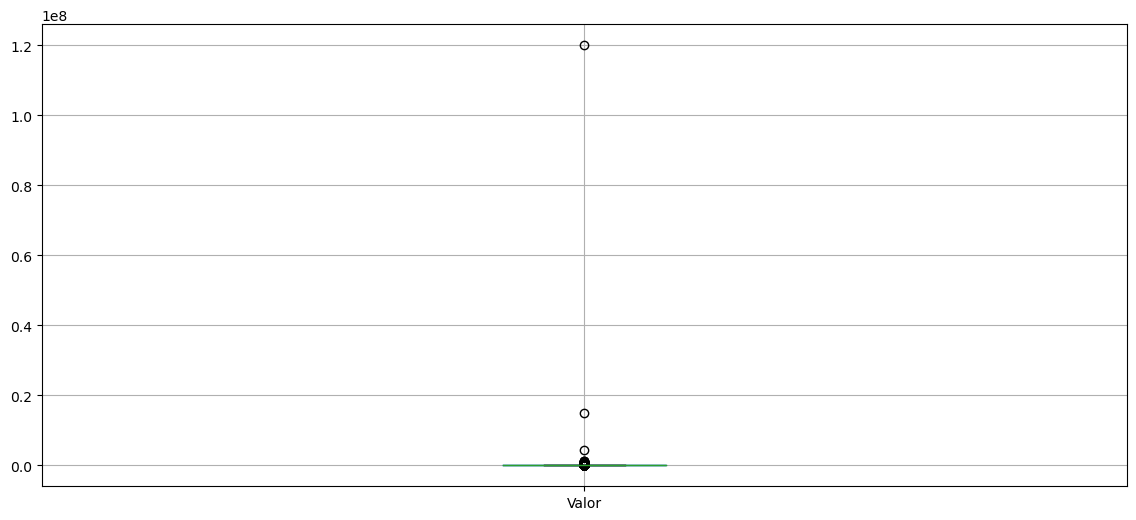

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
826,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,NaN,NaN
884,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0
1163,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0
2722,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0
2994,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,NaN,1000.0
4628,Prédio Inteiro,Centro,0,0,0,6986,560000.0,NaN,NaN
5565,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,NaN
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,NaN,10000.0
8067,Prédio Inteiro,Centro,0,90,0,7774,505310.0,NaN,NaN


In [5]:
 valor = dados['Valor']

In [6]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ 

In [7]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

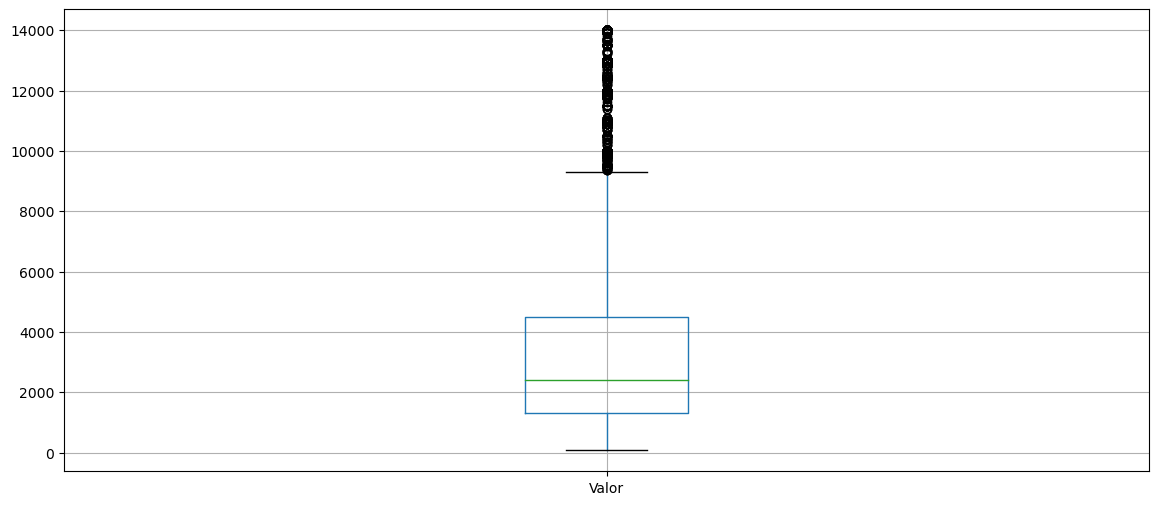

In [8]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

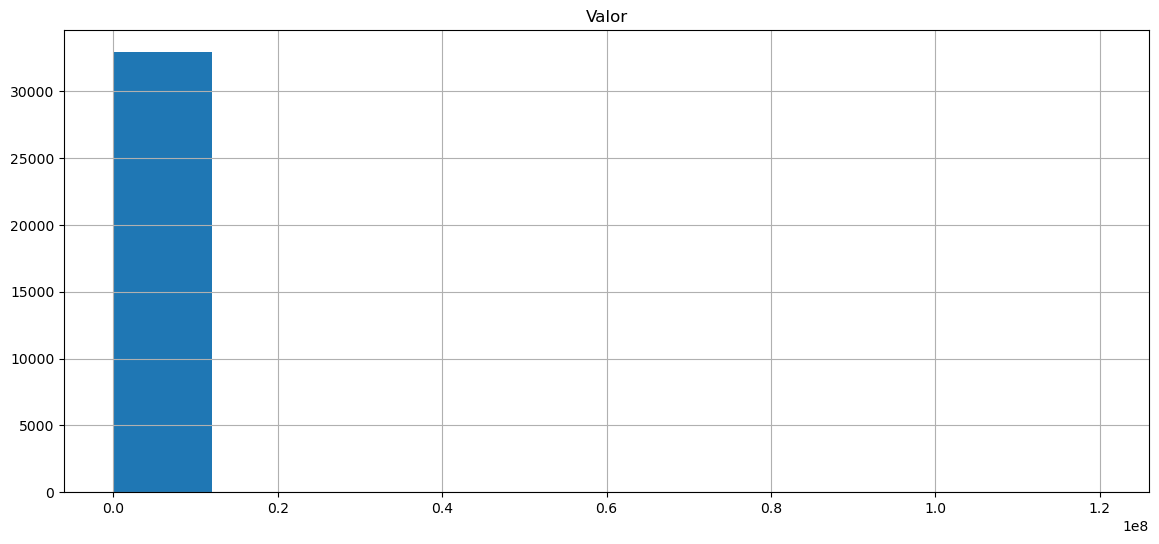

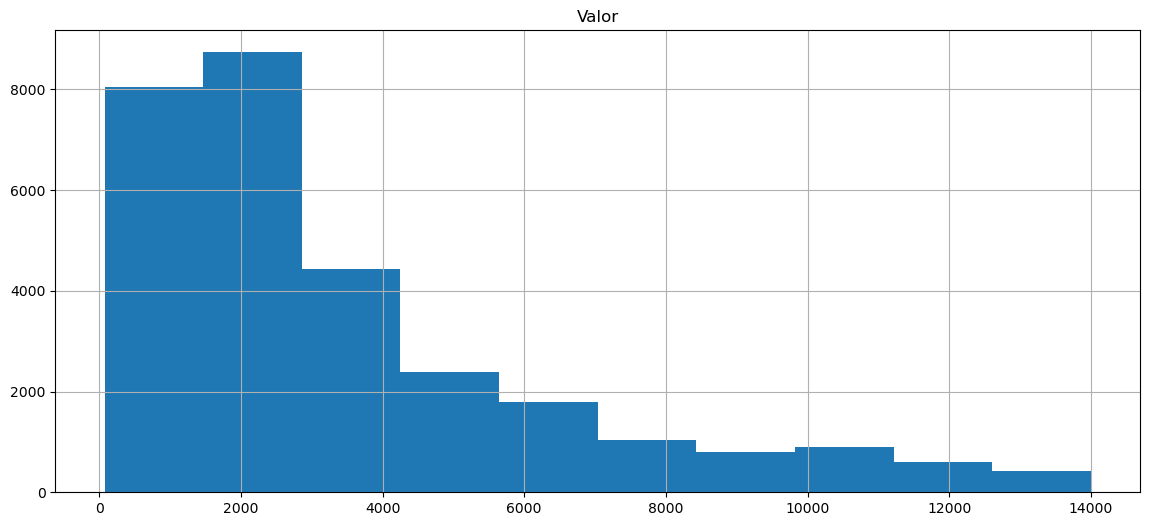

In [9]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo Outliers

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

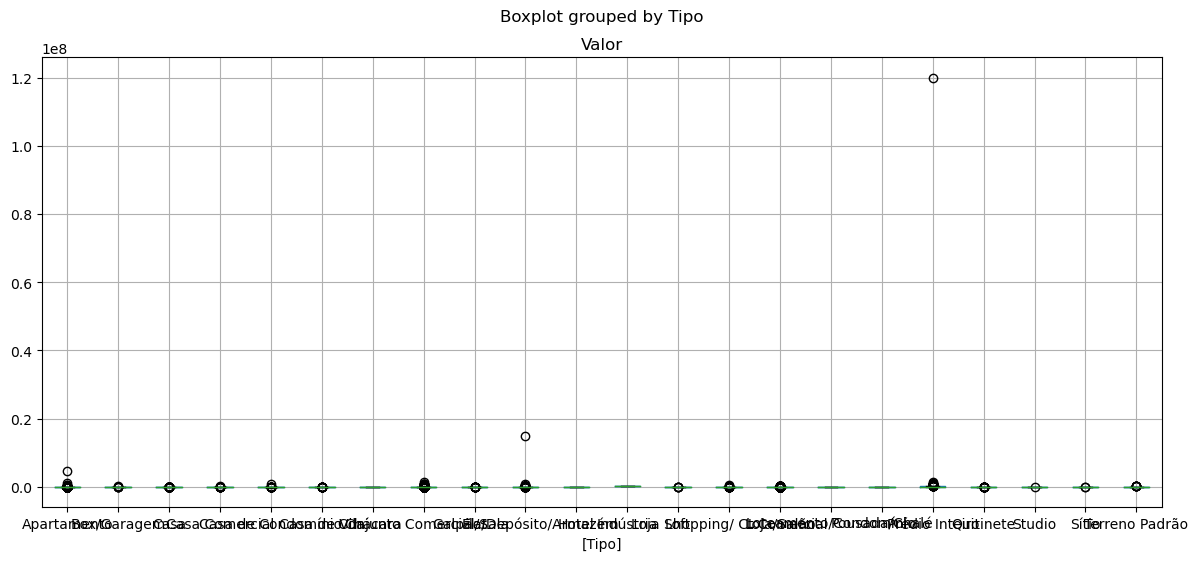

In [12]:
dados.boxplot(['Valor'], by=['Tipo'])

In [15]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [16]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [17]:
grupo_tipo.groups

{'Apartamento': [3, 4, 5, 6, 10, 11, 12, 13, 15, 19, 20, 21, 23, 24, 27, 28, 30, 32, 33, 34, 36, 37, 40, 41, 43, 44, 47, 48, 49, 50, 51, 54, 55, 56, 57, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 73, 75, 76, 77, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 104, 106, 107, 109, 111, 113, 114, 118, 119, 121, 122, 124, 125, 126, 131, 132, 133, 134, 135, 137, 139, 140, 141, 147, 148, 152, 153, 154, 158, 160, 162, 163, 164, 165, 166, 167, 170, ...], 'Box/Garagem': [207, 373, 579, 885, 1014, 1636, 1664, 1850, 1945, 2502, 3084, 3471, 3587, 3605, 3783, 3860, 3960, 4000, 4273, 5885, 6123, 6775, 7169, 7446, 7932, 9239, 9309, 9327, 9726, 10304, 10467, 11488, 12056, 12118, 12229, 12763, 12783, 13251, 13887, 13970, 15116, 15635, 16270, 16518, 17413, 17631, 18089, 18777, 19106, 19585, 20039, 20296, 20805, 21262, 21346, 21689, 22339, 22351, 22559, 23957, 24470, 24801, 25072, 25206, 25385, 25636, 26346, 26758, 26831, 27673, 28675, 28691, 28692, 28931, 29441, 30071, 30261, 30863, 31175, 31646,

In [18]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ 

In [19]:
Q1

Tipo
Apartamento                      1600.0
Box/Garagem                       250.0
Casa                             1100.0
Casa Comercial                   6000.0
Casa de Condomínio               4000.0
Casa de Vila                      750.0
Chácara                          4900.0
Conjunto Comercial/Sala          1000.0
Flat                             2500.0
Galpão/Depósito/Armazém          7000.0
Hotel                           18500.0
Indústria                      120000.0
Loft                             1750.0
Loja Shopping/ Ct Comercial      1500.0
Loja/Salão                       2200.0
Loteamento/Condomínio           14000.0
Pousada/Chalé                    1480.0
Prédio Inteiro                  14900.0
Quitinete                         900.0
Studio                           1500.0
Sítio                            9750.0
Terreno Padrão                   8000.0
Name: Valor, dtype: float64

In [20]:
Q3

Tipo
Apartamento                      5000.0
Box/Garagem                       450.0
Casa                             9800.0
Casa Comercial                  18000.0
Casa de Condomínio              15250.0
Casa de Vila                     1800.0
Chácara                          4900.0
Conjunto Comercial/Sala          9950.0
Flat                             6000.0
Galpão/Depósito/Armazém         27750.0
Hotel                           31500.0
Indústria                      120000.0
Loft                             3000.0
Loja Shopping/ Ct Comercial      5500.0
Loja/Salão                      12000.0
Loteamento/Condomínio           25000.0
Pousada/Chalé                    1480.0
Prédio Inteiro                  80000.0
Quitinete                        1500.0
Studio                           2450.0
Sítio                           15000.0
Terreno Padrão                  40000.0
Name: Valor, dtype: float64

In [21]:
IIQ

Tipo
Apartamento                     3400.0
Box/Garagem                      200.0
Casa                            8700.0
Casa Comercial                 12000.0
Casa de Condomínio             11250.0
Casa de Vila                    1050.0
Chácara                            0.0
Conjunto Comercial/Sala         8950.0
Flat                            3500.0
Galpão/Depósito/Armazém        20750.0
Hotel                          13000.0
Indústria                          0.0
Loft                            1250.0
Loja Shopping/ Ct Comercial     4000.0
Loja/Salão                      9800.0
Loteamento/Condomínio          11000.0
Pousada/Chalé                      0.0
Prédio Inteiro                 65100.0
Quitinete                        600.0
Studio                           950.0
Sítio                           5250.0
Terreno Padrão                 32000.0
Name: Valor, dtype: float64

In [22]:
limite_inferior

Tipo
Apartamento                     -3500.0
Box/Garagem                       -50.0
Casa                           -11950.0
Casa Comercial                 -12000.0
Casa de Condomínio             -12875.0
Casa de Vila                     -825.0
Chácara                          4900.0
Conjunto Comercial/Sala        -12425.0
Flat                            -2750.0
Galpão/Depósito/Armazém        -24125.0
Hotel                           -1000.0
Indústria                      120000.0
Loft                             -125.0
Loja Shopping/ Ct Comercial     -4500.0
Loja/Salão                     -12500.0
Loteamento/Condomínio           -2500.0
Pousada/Chalé                    1480.0
Prédio Inteiro                 -82750.0
Quitinete                           0.0
Studio                             75.0
Sítio                            1875.0
Terreno Padrão                 -40000.0
Name: Valor, dtype: float64

In [23]:
limite_superior

Tipo
Apartamento                     10100.0
Box/Garagem                       750.0
Casa                            22850.0
Casa Comercial                  36000.0
Casa de Condomínio              32125.0
Casa de Vila                     3375.0
Chácara                          4900.0
Conjunto Comercial/Sala         23375.0
Flat                            11250.0
Galpão/Depósito/Armazém         58875.0
Hotel                           51000.0
Indústria                      120000.0
Loft                             4875.0
Loja Shopping/ Ct Comercial     11500.0
Loja/Salão                      26700.0
Loteamento/Condomínio           41500.0
Pousada/Chalé                    1480.0
Prédio Inteiro                 177650.0
Quitinete                        2400.0
Studio                           3875.0
Sítio                           22875.0
Terreno Padrão                  88000.0
Name: Valor, dtype: float64

In [25]:
dado_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dado_new = pd.concat([dado_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

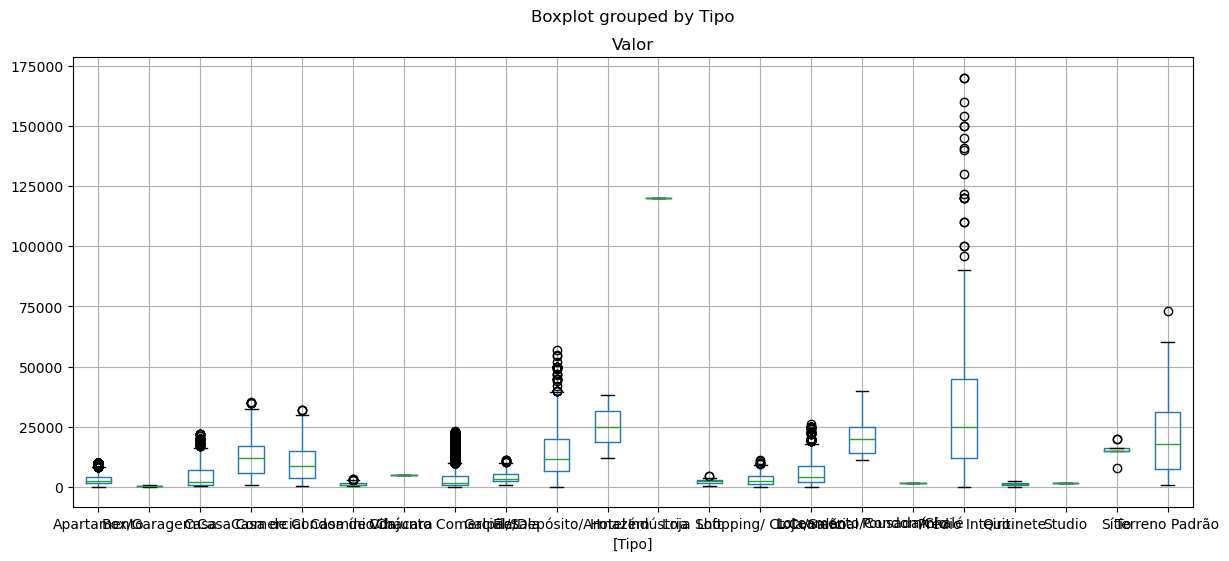

In [26]:
 dado_new.boxplot(['Valor'], by=['Tipo'])

In [27]:
dado_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep=';', index=False)